# Initialization and build design matrix


In [9]:
from nilearn.glm.first_level import compute_regressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import math
import os
from nilearn import datasets, image

emotion_file = "./csv_output/500days_of_summer_EMOTIONS.csv"
df = pd.read_csv(emotion_file)

In [10]:
df

,Unnamed: 0,start_time,end_time,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,0,61.960,65.16,This is a story of boy meets girl.,4,neutral,0.884392,0.003660,0.010187,0.003164,0.056004,0.884392,0.005289,0.037304
1,1,69.280,77.56,"The boy, Tom Hansen of Margate, New Jersey gre...",3,joy,0.710151,0.006280,0.005544,0.002888,0.710151,0.118338,0.091654,0.065146
2,2,77.680,85.08,This belief stemmed from early exposure to sad...,5,sadness,0.934445,0.003297,0.016433,0.006103,0.002715,0.030949,0.934445,0.006058
3,3,85.200,87.40,Elaine! Elaine!,6,surprise,0.365089,0.141201,0.014467,0.008606,0.360221,0.086305,0.024110,0.365089
4,4,87.519,92.60,"The girl, Summer finn of Shinnecock, Michigan ...",4,neutral,0.823927,0.010618,0.053457,0.012385,0.002992,0.823927,0.069859,0.026762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1292,5354.960,5358.36,What's this about I figured love would shine t...,4,neutral,0.649745,0.017027,0.004605,0.003271,0.027995,0.649745,0.017208,0.280148
1293,1293,5358.479,5361.84,"We've lost romance This world, its turns will ...",4,neutral,0.837589,0.004694,0.005800,0.003177,0.018543,0.837589,0.063418,0.066777
1294,1294,5361.960,5365.24,Open your mind Believe it's gonna come true,4,neutral,0.558628,0.082361,0.006238,0.025098,0.199932,0.558628,0.007455,0.120289
1295,1295,5365.359,5368.84,Keep romance alive and hope she's gonna tell you,4,neutral,0.586772,0.014756,0.004861,0.003368,0.369380,0.586772,0.008724,0.012140


In [13]:
df['start_time'] = list(map(lambda x: math.ceil(x), df['start_time'] ))
df['end_time']  = list(map(lambda x: math.ceil(x), df['end_time'] ))
df['diff'] = np.diff(df.iloc[:,1:3])
df

,Unnamed: 0,start_time,end_time,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise,diff
0,0,62,66,This is a story of boy meets girl.,4,neutral,0.884392,0.003660,0.010187,0.003164,0.056004,0.884392,0.005289,0.037304,4
1,1,70,78,"The boy, Tom Hansen of Margate, New Jersey gre...",3,joy,0.710151,0.006280,0.005544,0.002888,0.710151,0.118338,0.091654,0.065146,8
2,2,78,86,This belief stemmed from early exposure to sad...,5,sadness,0.934445,0.003297,0.016433,0.006103,0.002715,0.030949,0.934445,0.006058,8
3,3,86,88,Elaine! Elaine!,6,surprise,0.365089,0.141201,0.014467,0.008606,0.360221,0.086305,0.024110,0.365089,2
4,4,88,93,"The girl, Summer finn of Shinnecock, Michigan ...",4,neutral,0.823927,0.010618,0.053457,0.012385,0.002992,0.823927,0.069859,0.026762,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1292,5355,5359,What's this about I figured love would shine t...,4,neutral,0.649745,0.017027,0.004605,0.003271,0.027995,0.649745,0.017208,0.280148,4
1293,1293,5359,5362,"We've lost romance This world, its turns will ...",4,neutral,0.837589,0.004694,0.005800,0.003177,0.018543,0.837589,0.063418,0.066777,3
1294,1294,5362,5366,Open your mind Believe it's gonna come true,4,neutral,0.558628,0.082361,0.006238,0.025098,0.199932,0.558628,0.007455,0.120289,4
1295,1295,5366,5369,Keep romance alive and hope she's gonna tell you,4,neutral,0.586772,0.014756,0.004861,0.003368,0.369380,0.586772,0.008724,0.012140,3


In [77]:
all_start_time = np.repeat(df['start_time'].to_numpy()[np.newaxis,:],7,axis=0).flatten().tolist()
all_diff = np.repeat(df['diff'].to_numpy()[np.newaxis,:],7,axis=0).flatten().tolist()
emo = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
all_emotions = np.repeat(emo,df.shape[0]).tolist()
amp = np.hstack((df['anger'], df['disgust'], df['fear'], df['joy'], df['neutral'], df['sadness'], df['surprise'])).tolist()

In [78]:
from nilearn.glm.first_level import make_first_level_design_matrix

conditions = df['label'].tolist()
duration =df['diff'].tolist()
# these are the corresponding onset times
onsets = df['start_time'].tolist()

events = pd.DataFrame(
    {"trial_type": all_emotions, 
     "onset": all_start_time, 
     "duration": all_diff,
    "modulation": amp
     }
)

frame_times = np.linspace(df['start_time'].iloc[0],  df['end_time'].iloc[-1], df['end_time'].iloc[-1] - df['start_time'].iloc[0] +1)

In [79]:
events


,trial_type,onset,duration,modulation
0,anger,62,4,0.003660
1,anger,70,8,0.006280
2,anger,78,8,0.003297
3,anger,86,2,0.141201
4,anger,88,5,0.010618
...,...,...,...,...
9074,surprise,5355,4,0.280148
9075,surprise,5359,3,0.066777
9076,surprise,5362,4,0.120289
9077,surprise,5366,3,0.012140


In [80]:
from nilearn.glm.first_level import make_first_level_design_matrix

hrf_model = "glover" 
# HRF model from SPM (default)
# linear combination of two gamma functions, time lenght 32s, onset 0s
X1 = make_first_level_design_matrix(
    frame_times,
    events,
    hrf_model=hrf_model,
)

C:\Users\NA\AppData\Local\Temp\ipykernel_20856\3746594800.py:6: UserWarning: The following conditions contain events with null duration:
- 'anger'
- 'disgust'
- 'fear'
- 'joy'
- 'neutral'
- 'sadness'
- 'surprise'

  X1 = make_first_level_design_matrix(


[make_first_level_design_matrix] A 'modulation' column was found in the given events data and is used.

C:\Users\NA\AppData\Local\Temp\ipykernel_20856\3746594800.py:6: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  X1 = make_first_level_design_matrix(


In [81]:
X1

,anger,disgust,fear,joy,neutral,sadness,surprise,drift_1,drift_2,drift_3,...,drift_98,drift_99,drift_100,drift_101,drift_102,drift_103,drift_104,drift_105,drift_106,constant
62.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019398,0.019398,0.019398,...,0.019390,0.019390,0.019390,0.019390,0.019389,0.019389,0.019389,0.019389,0.019389,1.0
63.0,0.000002,0.000005,0.000002,0.000027,0.000428,0.000003,0.000018,0.019398,0.019398,0.019398,...,0.019325,0.019324,0.019322,0.019321,0.019319,0.019317,0.019316,0.019314,0.019313,1.0
64.0,0.000078,0.000217,0.000067,0.001192,0.018831,0.000113,0.000794,0.019398,0.019398,0.019398,...,0.019195,0.019191,0.019187,0.019183,0.019178,0.019174,0.019170,0.019165,0.019161,1.0
65.0,0.000481,0.001338,0.000416,0.007357,0.116185,0.000695,0.004901,0.019398,0.019398,0.019398,...,0.019001,0.018993,0.018985,0.018976,0.018968,0.018960,0.018951,0.018942,0.018934,1.0
66.0,0.001365,0.003799,0.001180,0.020884,0.329800,0.001972,0.013911,0.019398,0.019398,0.019398,...,0.018743,0.018730,0.018716,0.018702,0.018689,0.018675,0.018661,0.018647,0.018632,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372.0,0.080799,0.030037,0.015452,0.404660,0.468522,-0.003259,0.003796,-0.019398,0.019398,-0.019398,...,0.018743,-0.018730,0.018716,-0.018702,0.018689,-0.018675,0.018661,-0.018647,0.018632,1.0
5373.0,0.116410,0.074593,0.011038,0.362550,0.420346,0.002944,0.012118,-0.019398,0.019398,-0.019398,...,0.019001,-0.018993,0.018985,-0.018976,0.018968,-0.018960,0.018951,-0.018942,0.018934,1.0
5374.0,0.177252,0.135722,0.009112,0.265348,0.359526,0.013544,0.039497,-0.019398,0.019398,-0.019398,...,0.019195,-0.019191,0.019187,-0.019183,0.019178,-0.019174,0.019170,-0.019165,0.019161,1.0
5375.0,0.245000,0.197706,0.009229,0.147179,0.299833,0.025181,0.075873,-0.019398,0.019398,-0.019398,...,0.019325,-0.019324,0.019322,-0.019321,0.019319,-0.019317,0.019316,-0.019314,0.019313,1.0


C:\Users\NA\AppData\Local\Temp\ipykernel_20856\2393152921.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


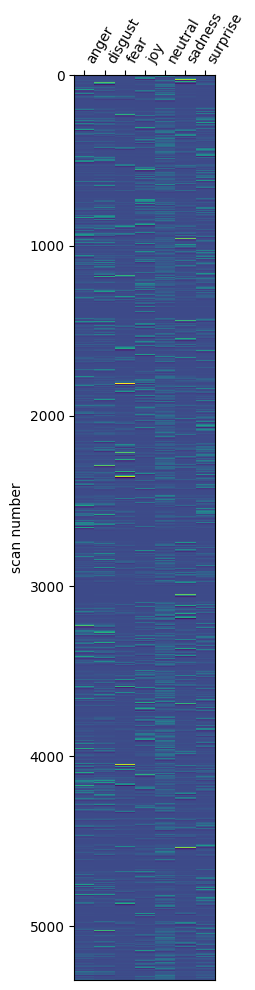

In [82]:
from nilearn.plotting import plot_design_matrix, plot_design_matrix_correlation
plot_design_matrix(X1.iloc[:, 0:7])

plt.tight_layout()
plt.show()

## segment the convolve stimulus

In [9]:
arr = (design_mat.to_numpy() != 0)

# find start segment
# roll shift the roll down 1, invert boolean value (t -> no value f -> have value)
starts = arr & ~np.roll(arr, 1, axis=0)  # this will be true when current cell is T and the previous cell has no value
starts[0, :] = arr[0, :]  # fix first row edge

# Assign run IDs within each column
run_id = np.cumsum(starts, axis=0) #makes an integer array where the value increases by 1 each time a start is encountered
run_id[~arr] = 0  # zeros are not in any run

# For each column, compute run lengths via bincount
shortest_per_col = []
for j in range(arr.shape[1]):
    ids = run_id[:, j]
    if ids.max() == 0:
        shortest_per_col.append(np.nan)  # no non-zero in this column
        continue
    counts = np.bincount(ids, minlength=ids.max() + 1)[1:]  # skip id 0
    shortest_per_col.append(counts.min())

shortest_per_col = pd.Series(shortest_per_col, index=design_mat.columns, name="shortest_run_len")
min_segment = np.min(shortest_per_col)
min_segment

32

In [10]:
new_run_id = np.zeros_like(run_id)
for j in range(arr.shape[1]):
    col_ids = run_id[:, j]
    current_id = 1  # New run ID counter
    for run in range(1, col_ids.max() + 1):
        # Find indices of this run
        run_indices = np.where(col_ids == run)[0]
        if len(run_indices) == 0:
            continue
        # Split into chunks of shortest_len
        for start in range(0, len(run_indices), min_segment):
            end = min(start + min_segment, len(run_indices))
            new_run_id[run_indices[start:end], j] = current_id
            current_id += 1

In [11]:
new_run_id.shape

(5315, 114)

# extract brain fMRI and ROI seed

## build class

In [12]:
from function.atlas_masking import AtlasMaskGenerator

fmri_dir = "//wsl.localhost/Ubuntu/home/jirapong/brain_im/"
tr = 1.0
base_out_path = "./masks_insular_amygdala"
amyg_subcortical_atlas='sub-maxprob-thr25-1mm'
cortical_atlas = 'cort-maxprob-thr25-1mm'

movie = "500daysofsummer"
fmri_vox = []


amygdala_mask = AtlasMaskGenerator(atlas_type=amyg_subcortical_atlas, output_dir= base_out_path)
insular_mask = AtlasMaskGenerator(atlas_type=cortical_atlas, output_dir= base_out_path)

if not os.path.isdir(base_out_path):
    os.mkdir(base_out_path)

for dir in os.listdir(fmri_dir):
    path_ = os.path.join(fmri_dir,dir)
    
    if os.path.isdir(path_):
        subject_id = dir

        func_img_path = path_ +"/func/" + subject_id + "_task-" + movie + "_bold_blur_censor_ica.nii.gz"
        if not os.path.exists(func_img_path):
            print(f"Movie {movie} not found in {subject_id} ")
            continue
        else: 
            #fmri = fMRIBOLD(dir_path=func_img_path, t_r=tr, out_path=base_out_path)
            masked_amg = amygdala_mask.generate_masks(fmri_path= func_img_path, target_labels=["amygdala"], t_r= tr )
            masked_ins = insular_mask.generate_masks(fmri_path= func_img_path, target_labels=["insular"], t_r= tr)

            df = np.array(list(masked_amg[2].values())).transpose(1, 0, 2)  # New shape: (5470, 2, 189)
            masked_amg = df.reshape(df.shape[0], df.shape[1] * df.shape[2]) 

            vox_ts = np.hstack((masked_amg,masked_ins[2]['Insular Cortex']))
            vox_ts = vox_ts[62:5377] # need to identify manually
            fmri_vox.append(vox_ts)
    print(f"Processed {subject_id}: Masks generated ")

path = "./extracted_voxel/"
np.save( path + movie +'.npy', np.array(fmri_vox))


[fetch_atlas_harvard_oxford] Dataset found in C:\Users\NA\nilearn_data\fsl

[fetch_atlas_harvard_oxford] Dataset found in C:\Users\NA\nilearn_data\fsl

c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-16: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-10: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-5: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-1: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-19: Masks generated 
Processed sub-32: Masks generated 
Processed sub-32: Masks generated 
Processed sub-35: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-11: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-4: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-7: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-3: Masks generated 
Processed sub-3: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-2: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-9: Masks generated 
Processed sub-9: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-8: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-14: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-13: Masks generated 
Processed sub-28: Masks generated 
Processed sub-28: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-15: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-20: Masks generated 
Processed sub-26: Masks generated 
Processed sub-30: Masks generated 
Processed sub-30: Masks generated 
Processed sub-30: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-18: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-12: Masks generated 
Processed sub-12: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-6: Masks generated 


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Left Amygdala' saved to ./masks_insular_amygdala\mask_left_amygdala.nii.gz
Mask for 'Right Amygdala' saved to ./masks_insular_amygdala\mask_right_amygdala.nii.gz


c:\Users\NA\Saved Games\eeg_study\function\atlas_masking.py:96: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_mask = image.resample_to_img(mask, self.img, interpolation="nearest", force_resample= True)


Mask for 'Insular Cortex' saved to ./masks_insular_amygdala\mask_insular_cortex.nii.gz
Processed sub-17: Masks generated 


In [17]:
vox_path = "./extracted_voxel/500daysofsummer.npy"
vox = np.load(vox_path)
vox.shape

(20, 5315, 1163)

## 1d cnn model

- balance data class
- label line by line

In [19]:
Y_tmp = X1.iloc[:, 0:7].to_numpy()  # (5315, 7)
Y_class = np.argmax(Y_tmp, axis=1)  # (5315,)

# Broadcast to all subjects
num_subjects = vox.shape[0]
num_timepoints = vox.shape[1]

# X shape: (num_subjects, num_timepoints, features)
X = vox  # already correct shape

# Y shape: (num_subjects, num_timepoints, 1)
Y = np.tile(Y_class, (num_subjects, 1))[:, :, np.newaxis]

# Optionally flatten for ML: (num_subjects*num_timepoints, features), (num_subjects*num_timepoints, 1)
X_all = X.reshape(-1, X.shape[-1])
Y_all = Y.reshape(-1, 1)

X_all.shape, Y_all.shape

((106300, 1163), (106300, 1))

rebalance data

In [20]:
unique_values, counts = np.unique(Y_all, return_counts=True)
unique_values, counts

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([18220,  6560,  3140, 11420, 46760,  4460, 15740], dtype=int64))

In [ ]:
import torch
# Simple inverse frequency (normalized)
num_classes = len(counts)
inv_freq = 1.0 / counts
class_weights_inv = inv_freq / inv_freq.sum() * num_classes   # normalized to have mean ~1
class_weights_inv = torch.tensor(class_weights_inv, dtype=torch.float32)

# Effective number re-weighting (Cui et al. "Class-Balanced Loss")
beta = 0.9999  # try 0.99 .. 0.9999 (higher -> more extreme reweighting for large datasets)
effective_num = 1.0 - np.power(beta, counts)
class_weights_eff = (1.0 - beta) / effective_num
class_weights_eff = class_weights_eff / np.sum(class_weights_eff) * num_classes
class_weights_eff = torch.tensor(class_weights_eff, dtype=torch.float32)

print("inv weights:", class_weights_inv)
print("effective weights:", class_weights_eff)



inv weights: tensor([0.6143, 1.7062, 0.2394, 0.9801, 0.2394, 2.5096, 0.7111])
effective weights: tensor([0.7732, 1.3473, 0.6543, 0.9520, 0.6543, 1.8013, 0.8176])


In [89]:

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)   # shape (569, 32, 974)
        self.y = torch.tensor(y, dtype=torch.float32)   # shape (569, 7) → soft labels
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        X_item = self.X[idx].unsqueeze(0)  # add channel dim: [1, 32, 974]
        y_item = self.y[idx]
        return X_item, y_item

    
class Emotion1DCNN(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()
        # Input: (N, 1, 1163)

        # Block 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=120, kernel_size=5, padding=2)  # -> (N,120,1163)
        self.bn1   = nn.BatchNorm1d(120)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)  # -> (N,120,581)

        # Block 2
        self.conv2 = nn.Conv1d(in_channels=120, out_channels=32, kernel_size=3, padding=1)  # -> (N,32,581)
        self.bn2   = nn.BatchNorm1d(32)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)  # -> (N,32,290)

        # Flatten size: 32 * 290
        self.fc1 = nn.Linear(32 * 290, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x: [batch, 1, 32, 974]
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = x.flatten(1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x #F.log_softmax(x, dim=1)


In [129]:
def evaluate(model, data_loader, device="cpu"):
    model.eval()
    val_loss = 0
    correct = 0
    
    with torch.no_grad():
        all_preds, all_targets = [],[]
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).long()
            outputs = model(X_batch)
            #loss += soft_cross_entropy(outputs, y_batch).item() * X_batch.size(0)
            loss = nn.functional.cross_entropy(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
            preds = outputs.argmax(dim=1)
            targets = y_batch#.argmax(dim=1)
            correct += (preds == targets).sum().item()

            all_preds.append(preds.cpu())
            all_targets.append(targets )

    all_preds = torch.cat(all_preds).numpy()
    all_targets = torch.cat(all_targets).numpy()
    
    avg_loss = val_loss / len(data_loader.dataset)
    accuracy = correct / len(data_loader.dataset)
    return accuracy, avg_loss, all_preds, all_targets

#def soft_cross_entropy(pred, target):
    """
    pred: log-probs [batch, num_classes]
    target: probs [batch, num_classes]
    """
 #   return torch.mean(torch.sum(-target * pred, dim=1))

In [ ]:
def train_model(model, train_loader, val_loader, optimizer, num_epochs=200, device="cpu", patience=25):
    model.to(device)
    best_val_loss = float("inf")
    patience_counter = 0
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=5)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        
        for X_batch, y_batch in train_loader:
            # [batch,1 tr, 1163 (voxel)]
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).long()
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = nn.functional.cross_entropy(outputs, y_batch)
            #loss = soft_cross_entropy(outputs, y_batch)
            loss.backward()
            
            # gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
            optimizer.step()
            
            train_loss += loss.item() * X_batch.size(0)
            preds = outputs.argmax(dim=1)
            targets = y_batch
            correct += (preds == targets).sum().item()
        
        train_acc = correct / len(train_loader.dataset)
        val_acc, val_loss, _ ,_ = evaluate(model, val_loader, device)
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch+1}/{num_epochs} "
              f"Train Loss: {train_loss/len(train_loader.dataset):.4f} "
              f"Train Acc: {train_acc:.4f} "
              f"Val Loss: {val_loss:.4f} "
              f"Val Acc: {val_acc:.4f}")
        
        # early stopping
        if val_loss < best_val_loss - 1e-4:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

In [ ]:
import numpy as np
import torch
from torch.utils.data import Subset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split

test_frac = 0.10   # 10% test
val_frac  = 0.10   # 10% val
batch_size = 64
num_workers = 0
pin_memory = True
random_state = 42

Y_all = np.array(Y_all).ravel()
N = len(Y_all)
assert N == X_all.shape[0], "X_all and Y_all must have same length"


idxs = np.arange(N)


train_val_idx, test_idx, y_train_val, y_test = train_test_split(
    idxs, Y_all, test_size=test_frac, stratify=Y_all, random_state=random_state
)

val_frac_rel = val_frac / (1.0 - test_frac)

train_idx, val_idx, y_train, y_val = train_test_split(
    train_val_idx, y_train_val, test_size=val_frac_rel, stratify=y_train_val, random_state=random_state
)

print("Sizes -> full:", N, "train:", len(train_idx), "val:", len(val_idx), "test:", len(test_idx))

# build Dataset / Subset objects

full_dataset = EmotionDataset(X_all, Y_all)   

train_dataset = Subset(full_dataset, train_idx)
val_dataset   = Subset(full_dataset, val_idx)
test_dataset  = Subset(full_dataset, test_idx)

# build per-class inverse-frequency weights (for sampler) 
unique, counts_from_data = np.unique(Y_all, return_counts=True)
print("Label distribution (overall):", dict(zip(unique, counts_from_data)))

counts_arr = np.zeros(unique.max()+1, dtype=np.float32)
counts_arr[unique] = counts_from_data

inv_freq = 1.0 / counts_arr   # shape (C,)

full_sample_weights = inv_freq[Y_all]                # shape (N,)
train_sample_weights = full_sample_weights[train_idx]  # shape (len(train_dataset),)

train_sample_weights = torch.from_numpy(train_sample_weights).double()

sampler = WeightedRandomSampler(weights=train_sample_weights,
                                num_samples=len(train_sample_weights),   # epoch size
                                replacement=True)

# DataLoaders 
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler,
                          num_workers=num_workers, pin_memory=pin_memory)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=num_workers, pin_memory=pin_memory)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=num_workers, pin_memory=pin_memory)

assert len(train_dataset) == len(train_idx)
assert len(val_dataset)   == len(val_idx)
assert len(test_dataset)  == len(test_idx)
assert len(train_sample_weights) == len(train_dataset)

print("Done. Example: first train indices:", train_idx[:10])


Sizes -> full: 106300 train: 85040 val: 10630 test: 10630
Label distribution (overall): {0: 18220, 1: 6560, 2: 3140, 3: 11420, 4: 46760, 5: 4460, 6: 15740}
Done. Example: first train indices: [ 1831 47737 20591  8131 50732  2586 23955  7782 16197 51655]


In [114]:
# Model, loss, optimizer
model = Emotion1DCNN(num_classes=num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Train
train_model(model, train_loader, val_loader, optimizer, num_epochs=200)

Epoch 1/200 Train Loss: 1.9478 Train Acc: 0.1439 Val Loss: 1.9523 Val Acc: 0.0295
Epoch 2/200 Train Loss: 1.9463 Train Acc: 0.1430 Val Loss: 1.9504 Val Acc: 0.0295
Epoch 3/200 Train Loss: 1.9461 Train Acc: 0.1420 Val Loss: 1.9489 Val Acc: 0.1714
Epoch 4/200 Train Loss: 1.9461 Train Acc: 0.1434 Val Loss: 1.9460 Val Acc: 0.1714
Epoch 5/200 Train Loss: 1.9459 Train Acc: 0.1417 Val Loss: 1.9454 Val Acc: 0.0394
Epoch 6/200 Train Loss: 1.9444 Train Acc: 0.1511 Val Loss: 1.9453 Val Acc: 0.0704
Epoch 7/200 Train Loss: 1.9393 Train Acc: 0.1590 Val Loss: 1.9351 Val Acc: 0.0727
Epoch 8/200 Train Loss: 1.9285 Train Acc: 0.1749 Val Loss: 1.9427 Val Acc: 0.0583
Epoch 9/200 Train Loss: 1.9150 Train Acc: 0.1847 Val Loss: 1.9391 Val Acc: 0.0530
Epoch 10/200 Train Loss: 1.8961 Train Acc: 0.1954 Val Loss: 1.9284 Val Acc: 0.0605
Epoch 11/200 Train Loss: 1.8767 Train Acc: 0.2042 Val Loss: 1.9212 Val Acc: 0.0702
Epoch 12/200 Train Loss: 1.8531 Train Acc: 0.2144 Val Loss: 1.9216 Val Acc: 0.0717
Epoch 13/200 

c:\Users\NA\.conda\envs\eeg_study\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



📊 sub_2 Metrics:
Accuracy  : 0.1388
Precision : 0.2627
Recall    : 0.1388
F1 Score  : 0.1433

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.17      0.17      1822
           1       0.06      0.18      0.09       656
           2       0.03      0.06      0.04       314
           3       0.12      0.22      0.15      1142
           4       0.43      0.08      0.14      4676
           5       0.05      0.13      0.07       446
           6       0.15      0.21      0.18      1574

    accuracy                           0.14     10630
   macro avg       0.15      0.15      0.12     10630
weighted avg       0.26      0.14      0.14     10630



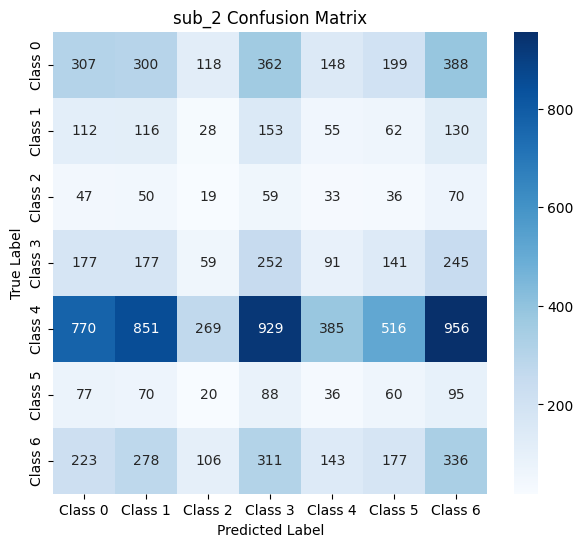

In [130]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

accuracy, loss, all_preds, all_targets = evaluate(model,test_loader)

acc = accuracy_score(all_targets, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average="weighted", zero_division=0)

print(f"\n📊 sub_2 Metrics:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nClassification Report:\n", classification_report(all_targets, all_preds, zero_division=0))

# Confusion Matrix Heatmap
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"Class {i}" for i in range(cm.shape[0])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
plt.title(f"sub_2 Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

- find better model

In [ ]:
from torch.utils.data import  WeightedRandomSampler
N, seq_len, features, num_classes = X_all.shape[0], 32, 974, 7
dataset = EmotionDataset(X, Y)

# Train/Val split (80/20)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# WeightedRandomSampler (balance training batches)
#inv_freq = 1.0 / counts  # or use class_weights_inv.numpy()
#sample_weights = inv_freq[Y_all].flatten()# per-sample weight array

#sample_weights = torch.from_numpy(sample_weights).double()  # WeightedRandomSampler expects float-like
#sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

#train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Model, loss, optimizer
model = Emotion2DCNN(num_classes=num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Train
train_model(model, train_loader, val_loader, optimizer, num_epochs=200)


IndexError: list index out of range

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import datasets, image, masking, plotting
from nilearn.glm.first_level import FirstLevelModel

fmri_img_2 = "//wsl.localhost/Ubuntu/home/jirapong/brain_im/sub-2/func/sub-2_task-500daysofsummer_bold_blur_censor_ica.nii.gz"   
t_r = 1.0                                         
confounds_tsv = None                              
output_dir = "seed_glm_results"  # your preprocessed fMRI data
os.makedirs(output_dir, exist_ok=True)

img_2 = image.load_img(fmri_img_2)
n_scans = img_2.shape[-1]
frame_times = np.arange(n_scans) * t_r

from function.function_ import mask_from_labels
from nilearn.input_data import NiftiMasker

# resample masks to functional image
amyg_mask_2 = image.resample_to_img(amyg_mask_sub, img_2, interpolation="nearest")
insula_mask_2 = image.resample_to_img(insula_mask_cort, img_2, interpolation="nearest")

# create masker object to extract ROI
amyg_masker_2 = NiftiMasker(mask_img=amyg_mask_2, standardize=True, t_r=t_r)
ins_masker_2  = NiftiMasker(mask_img=insula_mask_2, standardize=True, t_r=t_r)

# extractr ROIs
amyg_ts_2 = amyg_masker_2.fit_transform(img_2).squeeze()
ins_ts_2  = ins_masker_2.fit_transform(img_2).squeeze()
vox_ts = np.hstack((amyg_ts_2,ins_ts_2))
vox_ts = vox_ts[62:5377]

# extract feature from each emotional class and construct probability matrix

stimulus_marker = pd.DataFrame(new_run_id[:,0:7])
lables = [0,1,2,3,4,5,6]
X_all = []
Y_all = []
X = []
Y = []
for label in lables:
    col_ids = stimulus_marker[label]
    for run in range(1, col_ids.max() + 1):
        run_indices = np.where(col_ids == run)[0]
        if len(run_indices) != 32:
            continue

        Y_tmp = X1.iloc[run_indices[0]:run_indices[-1]+1,:]
        Y_tmp = Y_tmp.iloc[:,0:7]
        Y_prob = cal_prob(Y_tmp)

        X_tmp = vox_ts[run_indices[0]:run_indices[-1]+1,:]
        X_tmp = np.array(X_tmp)[np.newaxis,:]
        if len(X) == 0:
            X = X_tmp
            Y = Y_prob
        else:
            X = np.concatenate((X,X_tmp), axis = 0)
            Y = np.concatenate((Y,Y_prob))
    
    if len(X_all) == 0:
        X_all = X
        Y_all = Y
    else:
        X_all = np.concatenate((X_all,X), axis = 0)
        Y_all = np.concatenate((Y_all,Y), axis = 0)


C:\Users\NA\AppData\Local\Temp\ipykernel_12576\3835561507.py:21: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  amyg_mask_2 = image.resample_to_img(amyg_mask_sub, img_2, interpolation="nearest")
C:\Users\NA\AppData\Local\Temp\ipykernel_12576\3835561507.py:21: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  amyg_mask_2 = image.resample_to_img(amyg_mask_sub, img_2, interpolation="nearest")
C:\Users\NA\AppData\Local\Temp\ipykernel_12576\3835561507.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  insula_mask_2 = image.resample_to_img(insula_mask_cort, img_2, interpolation="nearest")
C:\Users\NA\

In [65]:
X_all.shape, Y_all.shape

((1718, 32, 974), (1718, 7))

In [86]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
def predict(model, data_loader, device="cpu"):
    model.eval()
    all_probs = []
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)                   # log-probs
            probs = torch.exp(outputs)                 # convert log-probs → probabilities
            preds = probs.argmax(dim=1)                # predicted class
            
            all_probs.append(probs.cpu())
            all_preds.append(preds.cpu())
            all_targets.append(y_batch.cpu())
    
    all_probs = torch.cat(all_probs, dim=0)
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)
    
    return all_probs, all_preds, all_targets

def evaluate_model(model, data_loader, device="cpu", set_name="Validation"):
    model.eval()
    loss = 0
    
    with torch.no_grad():
        all_probs, all_preds, all_targets = [], [], []
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            if X_batch.dim() == 3:  
                X_batch = X_batch.unsqueeze(1)
            outputs = model(X_batch)
            probs = torch.exp(outputs)              # probabilities
            preds = probs.argmax(dim=1)             # predicted class

            all_probs.append(probs.cpu())
            all_preds.append(preds.cpu())
            all_targets.append(y_batch.unsqueeze(0).argmax(dim=1) )

    all_probs = torch.cat(all_probs).numpy()
    all_preds = torch.cat(all_preds).numpy()
    all_targets = torch.cat(all_targets).numpy()

    return all_preds, all_probs, all_targets
    '''
    acc = accuracy_score(all_targets, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average="weighted", zero_division=0)
    
    print(f"\n📊 {set_name} Metrics:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print("\nClassification Report:\n", classification_report(all_targets, all_preds, zero_division=0))
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(all_targets, all_preds)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=[f"Class {i}" for i in range(cm.shape[0])],
                yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
    plt.title(f"{set_name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
    return acc, precision, recall, f1
    '''

from torch.utils.data import DataLoader, TensorDataset
#X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)   # (N, 1, 32, 974)
#y_tensor = torch.tensor(Y, dtype=torch.long)            # (N,)

#test_data = TensorDataset(X_tensor, y_tensor)

test_loader = EmotionDataset(X_all,Y_all)
all_preds, all_probs, all_targets = evaluate_model(model, test_loader, device="cpu", set_name="Test")

In [87]:
all_targets.shape, all_preds.shape, all_probs.shape

((1718,), (1718,), (1718, 7))


📊 sub_2 Metrics:
Accuracy  : 0.7247
Precision : 0.5252
Recall    : 0.7247
F1 Score  : 0.6090

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00       101
           4       0.72      1.00      0.84      1245
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00       192

    accuracy                           0.72      1718
   macro avg       0.10      0.14      0.12      1718
weighted avg       0.53      0.72      0.61      1718



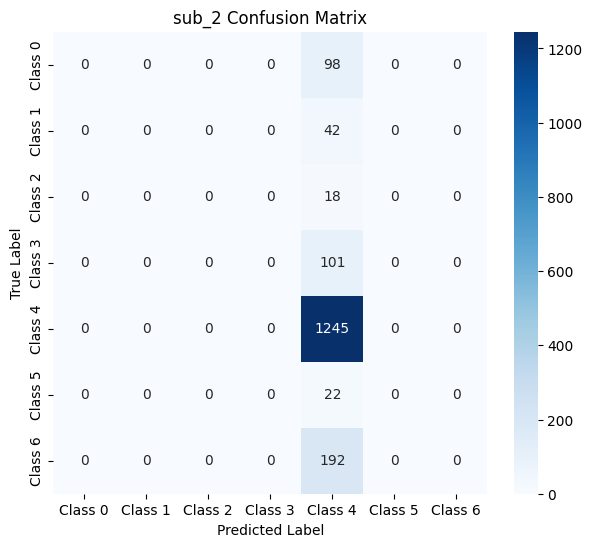

In [88]:
acc = accuracy_score(all_targets, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average="weighted", zero_division=0)

print(f"\n📊 sub_2 Metrics:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nClassification Report:\n", classification_report(all_targets, all_preds, zero_division=0))

# Confusion Matrix Heatmap
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"Class {i}" for i in range(cm.shape[0])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
plt.title(f"sub_2 Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

## fit glm and glm result evaluation

In [79]:
first_level_model = FirstLevelModel(
    t_r=t_r,
    slice_time_ref=0.5,
    hrf_model="spm",    # canonical HRF
    noise_model="ar1",
    standardize=True,
    signal_scaling=0,
    minimize_memory=False
)

# fit use event if there is only one stimulus
first_level = first_level_model.fit(img.slicer[:,:,:,62:5377], design_matrices=X1)

C:\Users\NA\AppData\Local\Temp\ipykernel_5948\2320272048.py:12: UserWarning: If design matrices are supplied, [hrf_model, slice_time_ref, t_r] will be ignored.
  first_level = first_level_model.fit(img.slicer[:,:,:,62:5377], design_matrices=X1)
C:\Users\NA\AppData\Local\Temp\ipykernel_5948\2320272048.py:12: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  first_level = first_level_model.fit(img.slicer[:,:,:,62:5377], design_matrices=X1)


In [81]:
amyg_residual = amyg_masker.fit_transform(first_level.residuals[0])
ins_residual= ins_masker.fit_transform(first_level.residuals[0])

print(amyg_residual.shape, ins_residual.shape)

print(f"Mean residuals: {amyg_residual.mean()}")
print(f"Mean residuals: {ins_residual.mean()}")

c:\Users\NA\.conda\envs\eeg_study\Lib\site-packages\nilearn\signal.py:834: RuntimeWarning: invalid value encountered in scalar divide
  np.abs(signals.mean(0)).mean() / np.abs(original_mean_signals).mean()


In [129]:
real_timeseries = amyg_masker.fit_transform(img)
predicted_timeseries = amyg_masker.transform(first_level.predicted[0])
real_timeseries = real_timeseries[62:5377,:]
print(np.sum(predicted_timeseries))

0.0


c:\Users\NA\.conda\envs\eeg_study\Lib\site-packages\nilearn\signal.py:834: RuntimeWarning: invalid value encountered in scalar divide
  np.abs(signals.mean(0)).mean() / np.abs(original_mean_signals).mean()


In [115]:
real_timeseries = ins_masker.fit_transform(img)
predicted_timeseries = ins_masker.fit_transform(first_level.predicted[0])
real_timeseries = real_timeseries[62:5377,:]
print(np.sum(predicted_timeseries))

-8.363727488358563e-10


Pearson r:    0.142
Spearman rho: 0.144
RMSE:         0.258
MAE:          0.202
R^2:          0.004


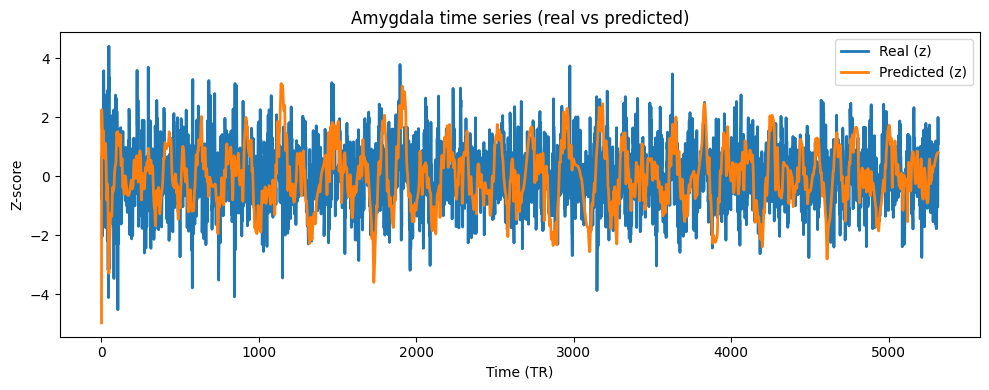

Residual mean: -0.0002603680414577586 Residual std: 0.25789839365557193
Residual lag-1 autocorr: 0.5904781667825663


In [116]:
from scipy import stats
if real_timeseries.ndim == 2 and real_timeseries.shape[1] > 1:
    real_1d = real_timeseries.mean(axis=1)
    pred_1d = predicted_timeseries.mean(axis=1)
else:
    real_1d = real_timeseries.squeeze()
    pred_1d = predicted_timeseries.squeeze()

assert real_1d.shape == pred_1d.shape

# 2) Standardize for shape comparison (optional)
real_z = (real_1d - real_1d.mean()) / real_1d.std(ddof=1)
pred_z = (pred_1d - pred_1d.mean()) / pred_1d.std(ddof=1)

# 3) Goodness-of-fit metrics
pearson_r = np.corrcoef(real_1d, pred_1d)[0, 1]
spearman_rho = stats.spearmanr(real_1d, pred_1d).correlation
rmse = np.sqrt(np.mean((real_1d - pred_1d) ** 2))
mae = np.mean(np.abs(real_1d - pred_1d))

# Coefficient of determination (R^2) relative to real signal variance
ss_res = np.sum((real_1d - pred_1d) ** 2)
ss_tot = np.sum((real_1d - real_1d.mean()) ** 2)
r2 = 1 - ss_res / ss_tot

print(f"Pearson r:   {pearson_r: .3f}")
print(f"Spearman rho:{spearman_rho: .3f}")
print(f"RMSE:        {rmse: .3f}")
print(f"MAE:         {mae: .3f}")
print(f"R^2:         {r2: .3f}")

# 4) Plot (optional)
plt.figure(figsize=(10, 4))
plt.plot(real_z, label="Real (z)", lw=2)
plt.plot(pred_z, label="Predicted (z)", lw=2)
plt.legend(); plt.xlabel("Time (TR)"); plt.ylabel("Z-score"); plt.title("Amygdala time series (real vs predicted)")
plt.tight_layout(); plt.show()

# 5) Residual diagnostics (optional)
resid = real_1d - pred_1d
print("Residual mean:", resid.mean(), "Residual std:", resid.std(ddof=1))
acf_lag1 = np.corrcoef(resid[:-1], resid[1:])[0, 1]
print("Residual lag-1 autocorr:", acf_lag1)

In [87]:
#compute contrast 
contrast_matrix = first_level_model.design_matrices_[0].columns
num = [0, 1, 2]
den = [3, 4, 5]

contrast = {c: 1.0/len(num) for c in num}
contrast.update({c: -1.0/len(den) for c in den})

f_map = first_level.compute_contrast(contrast, stat_type='F', output_type='stat')

# Save & plot result
amyg_values = masking.apply_mask(f_map, amyg_mask)
insula_values = masking.apply_mask(f_map, insula_mask)

print("Amygdala mean Z:", np.mean(amyg_values))
print("Insula mean Z:", np.mean(insula_values))

# Optional: plot ROI-restricted maps
plotting.plot_stat_map(f_map, title="Amygdala Z-map")
plotting.plot_stat_map(f_map, title="Insula Z-map")
plotting.show()


TypeError: FirstLevelModel.compute_contrast() got an unexpected keyword argument 'contrast_type'

# done

## import data, build mask and regressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import datasets, image, masking, plotting
from nilearn.glm.first_level import FirstLevelModel

fmri_img = "//wsl.localhost/Ubuntu/home/jirapong/brain_im/sub-1/func/sub-1_task-500daysofsummer_bold_blur_censor_ica.nii.gz"   
t_r = 1.0                                         
confounds_tsv = None                              
output_dir = "seed_glm_results"  # your preprocessed fMRI data
os.makedirs(output_dir, exist_ok=True)

img = image.load_img(fmri_img)
n_scans = img.shape[-1]
frame_times = np.arange(n_scans) * t_r

In [ ]:
from function.function_ import mask_from_labels
from nilearn.input_data import NiftiMasker

cortical = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
subcortical = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-1mm')

sub_img = image.load_img(subcortical.maps)   # label image
cort_img = image.load_img(cortical.maps)

amygdala_labels = subcortical.labels
insular_labels = cortical.labels

amyg_mask_sub = mask_from_labels(sub_img, subcortical.labels, ["amygdala"])
insula_mask_cort = mask_from_labels(cort_img, cortical.labels, ["insular"]) 

# resample masks to functional image
amyg_mask = image.resample_to_img(amyg_mask_sub, img, interpolation="nearest")
insula_mask = image.resample_to_img(insula_mask_cort, img, interpolation="nearest")

# Optional: save masks
amyg_mask.to_filename(os.path.join(output_dir, "mask_amygdala.nii.gz"))
insula_mask.to_filename(os.path.join(output_dir, "mask_insula.nii.gz"))

[fetch_atlas_harvard_oxford] Dataset found in C:\Users\NA\nilearn_data\fsl

[fetch_atlas_harvard_oxford] Dataset found in C:\Users\NA\nilearn_data\fsl

C:\Users\NA\AppData\Local\Temp\ipykernel_32060\486324083.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  amyg_mask = image.resample_to_img(amyg_mask_sub, img, interpolation="nearest")
C:\Users\NA\AppData\Local\Temp\ipykernel_32060\486324083.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  amyg_mask = image.resample_to_img(amyg_mask_sub, img, interpolation="nearest")
C:\Users\NA\AppData\Local\Temp\ipykernel_32060\486324083.py:18: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  insula_mask = image.resample_to_img(insula_mask_cort, img, interpolation="nearest")
C:\Users\NA\AppData\Local\T

In [ ]:
# create masker object to extract ROI
amyg_masker = NiftiMasker(mask_img=amyg_mask, standardize=True, t_r=t_r)
ins_masker  = NiftiMasker(mask_img=insula_mask, standardize=True, t_r=t_r)

# extractr ROIs
amyg_ts = amyg_masker.fit_transform(img).squeeze()
ins_ts  = ins_masker.fit_transform(img).squeeze()


## fmri extraction trial

In [ ]:
from function.fmri_bold import fMRIBOLD

output_dir = "./masks"
functional_img = "//wsl.localhost/Ubuntu/home/jirapong/brain_im/sub-1/func/sub-1_task-500daysofsummer_bold_blur_censor_ica.nii.gz"
t_r = 1.0
amyg_subcortical_atlas='sub-maxprob-thr25-1mm'
cortical_atlas = 'cort-maxprob-thr25-1mm'
fmri = fMRIBOLD(dir_path=functional_img, t_r=t_r, out_path="./masks")
masks_amg = fmri.create_masks(amyg_subcortical_atlas, target_labels=["amygdala"])
masks_ins = fmri.create_masks(cortical_atlas, target_labels=["insular"])

df = np.array(list(masks_amg[2].values())).transpose(1, 0, 2)  # New shape: (5470, 2, 189)
masks_amg = df.reshape(df.shape[0], df.shape[1] * df.shape[2]) 

vox_ts = np.hstack((masks_amg,masks_ins[2]['Insular Cortex']))
vox_ts = vox_ts[62:5377]

In [ ]:
# extract feature from each emotional class and construct probability matrix
'''
stimulus_marker = pd.DataFrame(new_run_id[:,0:7])
lables = [0,1,2,3,4,5,6]
X_all = []
Y_all = []
X = []
Y = []
for label in lables:
    col_ids = stimulus_marker[label]
    for run in range(1, col_ids.max() + 1):
        run_indices = np.where(col_ids == run)[0]
        if len(run_indices) != 32:
            continue

        Y_tmp = X1.iloc[run_indices[0]:run_indices[-1]+1,:]
        Y_tmp = Y_tmp.iloc[:,0:7]
        Y_prob = cal_prob(Y_tmp)

        X_tmp = vox_ts[run_indices[0]:run_indices[-1]+1,:]
        X_tmp = np.array(X_tmp)[np.newaxis,:]
        if len(X) == 0:
            X = X_tmp
            Y = Y_prob
        else:
            X = np.concatenate((X,X_tmp), axis = 0)
            Y = np.concatenate((Y,Y_prob))
    
    if len(X_all) == 0:
        X_all = X
        Y_all = Y
    else:
        X_all = np.concatenate((X_all,X), axis = 0)
        Y_all = np.concatenate((Y_all,Y), axis = 0)
    '''

## check abide dataset

In [50]:
from nilearn.datasets import fetch_abide_pcp
#subject_data = fetch_abide_pcp()


In [63]:
import pandas as pd

from nilearn import image, masking
from nilearn.datasets import fetch_spm_auditory
from nilearn.plotting import plot_stat_map, show

# load fMRI data
subject_data = fetch_spm_auditory()
fmri_img = subject_data.func[0]

# Make an average
mean_img = image.mean_img(fmri_img, copy_header=True)
mask = masking.compute_epi_mask(mean_img)

# Clean and smooth data
fmri_img = image.clean_img(fmri_img, standardize=False)
fmri_img = image.smooth_img(fmri_img, 5.0)

# load events
events = pd.read_csv(subject_data.events, sep="\t")

[wrapper] Dataset found in C:\Users\NA\nilearn_data\spm_auditory

In [64]:
from nilearn.glm.first_level import FirstLevelModel

fmri_glm = FirstLevelModel(
    t_r=7,
    drift_model="cosine",
    signal_scaling=False,
    mask_img=mask,
    minimize_memory=False,
)

fmri_glm = fmri_glm.fit(fmri_img, events)

C:\Users\NA\AppData\Local\Temp\ipykernel_5948\3846199933.py:11: UserWarning: [NiftiMasker.fit] Generation of a mask has been requested (imgs != None) while a mask was given at masker creation. Given mask will be used.
  fmri_glm = fmri_glm.fit(fmri_img, events)


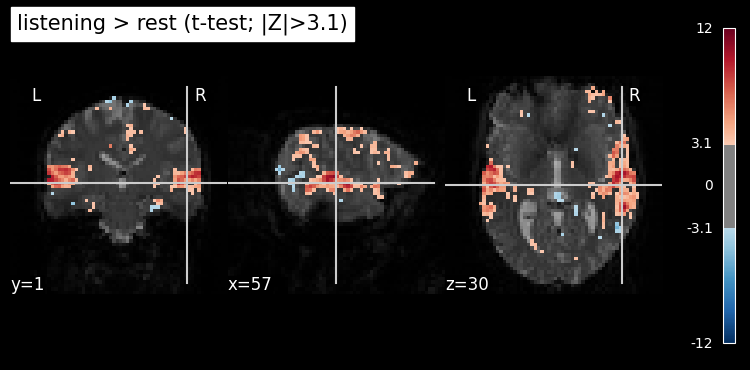

In [65]:
z_map = fmri_glm.compute_contrast("listening")

threshold = 3.1
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=threshold,
    title=f"listening > rest (t-test; |Z|>{threshold})",
)

show()

In [66]:
from nilearn.maskers import NiftiSpheresMasker
from nilearn.reporting import get_clusters_table

table = get_clusters_table(
    z_map, stat_threshold=threshold, cluster_threshold=20
)
table.set_index("Cluster ID", drop=True)
table.head()

# get the 6 largest clusters' max x, y, and z coordinates
coords = table.loc[range(1, 7), ["X", "Y", "Z"]].to_numpy()

# extract time series from each coordinate
masker = NiftiSpheresMasker(coords)
real_timeseries = masker.fit_transform(fmri_img)
predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

In [77]:
masker

NiftiSpheresMasker(memory=Memory(location=None),
                   seeds=array([[-51., -12.,  39.],
       [-39., -12.,  39.],
       [-63.,  12.,  33.],
       [ 60.,   0.,  36.],
       [ 66.,  12.,  27.],
       [ 60., -18.,  30.]]))

In [67]:
import nibabel as nib
from nilearn import plotting

display = plotting.view_img(fmri_img.slicer[:,:,:,0],  threshold=1e-3, colorbar=True)
show()


c:\Users\NA\.conda\envs\eeg_study\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [68]:
from nilearn.glm.first_level import FirstLevelModel

fmri_glm = FirstLevelModel(
    t_r=7,
    drift_model="cosine",
    signal_scaling=False,
    mask_img=mask,
    minimize_memory=False,
)

fmri_glm = fmri_glm.fit(fmri_img, events)

C:\Users\NA\AppData\Local\Temp\ipykernel_5948\3846199933.py:11: UserWarning: [NiftiMasker.fit] Generation of a mask has been requested (imgs != None) while a mask was given at masker creation. Given mask will be used.
  fmri_glm = fmri_glm.fit(fmri_img, events)


In [69]:
voxel_extraction =[] #size ((19+other region) * X)
count_extraction = [] #size (X, 1)
label_all = []
start_all = []
end_all = []
tmp = 0
segment = 0

for index, row in tqdm.tqdm(df.iterrows(), total=len(df)):
    start,end = math.ceil(row['start_time']),math.ceil(row['end_time']) # apply ceil function
    class_ = np.array([[row['pred']]])

    # dont need to interpolate the result
    #if tmp == 0:
    #    tmp = end
    #elif start != tmp:
    #    start = tmp
    #tmp = end

    count = np.repeat(segment,end-start)
    label = np.repeat(class_, end-start,axis =1)
    count = count[np.newaxis,:]
    #slice_vox = region_list_subjet[:,start:end] #TR = 1, 1 second = 1 voxel
    segment += 1
    if len(count_extraction) == 0:
        #voxel_extraction = slice_vox
        count_extraction = count
        label_all = label
        start_all  = start
        end_all = end
    else:
        #voxel_extraction = np.hstack((voxel_extraction,slice_vox))
        count_extraction = np.hstack((count_extraction,count))
        label_all = np.hstack((label_all,label))
        start_all = np.hstack((start_all, start))
        end_all = np.hstack((end_all, end))
        

100%|██████████| 1297/1297 [00:00<00:00, 31533.01it/s]


In [70]:
time = np.vstack((start_all,end_all))
np.diff(time,axis = 0)[0,0]
#np.diff(time,axis = 0)
time[0,:]

array([  62,   70,   78, ..., 5362, 5366, 5369])

In [71]:
time.shape

(2, 1297)

In [72]:
time_length = time[1,-1] - time[0,0] + 1
frame_times = np.linspace(time[0,0],  time[1,-1], time_length)
frame_times

array([  62.,   63.,   64., ..., 5374., 5375., 5376.])

In [73]:
onset, amplitude, duration = 0.0, 1.0, 1.0
exp_condition = [np.array((time[0,i], np.diff(time,axis = 0)[0,i], amplitude)).reshape(3, 1) for i in range(time.shape[1])]

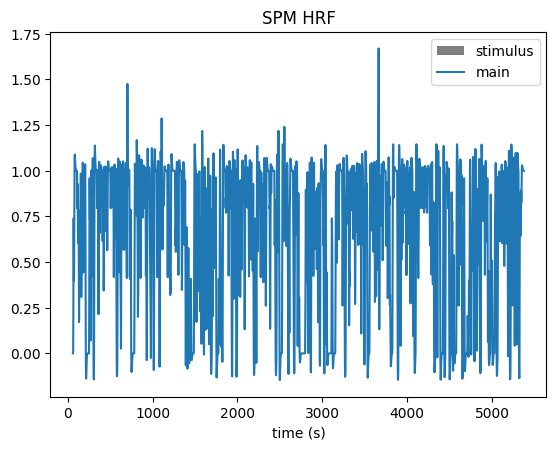

In [74]:
# interpolation (assign previous label)

#time_length = 30.0
#frame_times = np.linspace(0, time_length, 61) #all time
#onset, amplitude, duration = 0.0, 1.0, 1.0
#exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)
stim = np.zeros_like(frame_times)
stim[(frame_times > onset) * (frame_times <= onset + duration)] = amplitude

oversampling = 16
model_t = "SPM HRF"
labels = None

# Compute regressor for all exp_condition (multiple stimuli)
# exp_condition is a list of arrays, each with shape (3, 1)
# Stack them horizontally to create a (3, n_events) array
exp_condition_arr = np.hstack(exp_condition)
signal, _labels = compute_regressor(
    exp_condition_arr,
    "spm",
    frame_times,
    con_id="main",
    oversampling=oversampling,
)

plt.subplot(1, 1, 1)
plt.fill(frame_times, stim, "k", alpha=0.5, label="stimulus")
for j in range(signal.shape[1]):
    plt.plot(
        frame_times,
        signal.T[j],
        label=(
            labels[j]
            if labels is not None
            else (_labels[j] if _labels is not None else None)
        ),
    )
plt.xlabel("time (s)")
plt.legend(loc=1)
plt.title(model_t)

# adjust plot
plt.subplots_adjust(bottom=0.12)
plt.show()

In [75]:
signal.shape

(5315, 1)